In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2003 = pd.read_csv('ambits_2003.csv',delimiter=";",index_col="Unnamed: 0")
df2008 = pd.read_csv('ambits_2008.csv',delimiter=";",index_col="Unnamed: 0")
df2013 = pd.read_csv('ambits_2013.csv',delimiter=";",index_col="Unnamed: 0")
df2018= pd.read_csv('ambits_2018.csv',delimiter=";",index_col="Unnamed: 0")


In [2]:
print("Data Overview:")
df2003


Data Overview:


,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions,Total
Membres de la llar (1),34,"6,6","8,7","10,3","36,5","3,9",100
Amistats,"22,4","16,6","17,8","12,4","27,9","2,9",100
Veïns,"27,3","10,2","16,9","8,6","35,4","1,6",100
Companys d'estudi (2),"26,2","17,1","19,8","11,1","20,7","5,1",100
Companys de feina (3),"25,6","14,9","20,3","10,6","24,7","3,8",100
Petit comerç,"32,8","14,5","15,5","8,3","28,6","0,3",100
Gran comerç,30,"12,7",14,10,"31,8","1,5",100
Entitats financeres,"45,7","8,1",9,"4,7","30,9","1,7",100
Personal mèdic,"38,1","9,1","11,4",5,"35,7","0,8",100
Escriure notes personals,"28,6","3,6","6,1","4,1","53,8","3,8",100


In [3]:
df2003.drop('Total', axis=1, inplace=True)

In [4]:
df2003 = df2003.drop('Escriure notes personals')

In [5]:
df2018 = df2018.rename(columns={'Català i castellà': 'Ambdues'})
df2018 = df2018.rename(columns={'Altres llengües': 'Altres situacions'})
df2018 = df2018.drop('Usuaris o clients de Catalunya (4)') 
df2018 = df2018.drop('Administració local')
df2018 = df2018.drop('Administració de la Generalitat de Catalunya')
df2018 = df2018.drop("Administració de l'Estat")
df2018 = df2018.drop('Escriure notes personals')
df2018 = df2018.drop('Escriure missatges de mòbil')



In [6]:
df2008 = df2008.drop('Escriure notes personals')
df2008 = df2008.rename(columns={'Català i castellà': 'Ambdues'})
df2008 = df2008.rename(columns={'Altres llengües': 'Altres situacions'})

In [7]:
df2013 = df2013.rename(columns={'Català i castellà': 'Ambdues'})
df2013 = df2013.rename(columns={'Altres llengües': 'Altres situacions'})
df2013 = df2013.drop('Usuaris o clients de Catalunya (4)') 
df2013 = df2013.drop('Administració local')
df2013 = df2013.drop('Administració de la Generalitat de Catalunya')
df2013 = df2013.drop("Administració de l'Estat")
df2013 = df2013.drop('Escriure notes personals')
df2013 = df2013.drop('Escriure missatges de mòbil')




In [8]:
def rename_rows(df):
    df = df.copy() 
    df = df.rename(index={'Membres de la llar (1)':'Família'})
    df = df.rename(index={"Companys d'estudi (2)":"Companys d'estudi"})
    df = df.rename(index={"Companys de feina (3)":"Companys de feina"})
    return df

df2003=rename_rows(df2003)
df2008=rename_rows(df2008)
df2013=rename_rows(df2013)
df2018=rename_rows(df2018)


In [9]:
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Família,"27,2","5,6","7,8","10,1","37,7","11,6"
Amistats,"13,4","16,5","18,3","13,1","28,9","9,8"
Veïns,"16,8","14,3","17,1","10,9",37,"3,8"
Companys d'estudi,"18,2","18,1","19,1","12,9","19,9","11,7"
Companys de feina,"15,3","15,1","20,2","13,2",26,"10,3"
Petit comerç,"19,9",18,"18,2",10,"32,2","1,8"
Gran comerç,"17,1","15,9","18,7","11,9","34,3","2,2"
Entitats financeres,"30,1","11,6","12,4",7,"34,8","4,2"
Personal mèdic,"26,4","12,6","14,5","6,8","38,4","1,4"


In [10]:
def clean_dataframe(df, columns_to_convert):
    """
    Cleans the specified columns of a dataframe by:
    - Converting them to strings.
    - Replacing commas with dots.
    - Converting them to numeric, coercing errors.

    Parameters:
        df (pd.DataFrame): The dataframe to clean.
        columns_to_convert (list): List of column names to process.

    Returns:
        pd.DataFrame: The cleaned dataframe.
    """
    df = df.copy()  # Work on a copy to avoid modifying the original dataframe
    
    # Convert columns to strings
    df = df.astype({col: str for col in columns_to_convert})
    
    # Process each column
    for col in columns_to_convert:
        df[col] = df[col].apply(lambda x: x.replace(',', '.'))
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df


column_names= ['Només català',
                    'Més català que castellà',
                    'Ambdues',
                    'Més castellà que català',
                    'Només castellà',
                    'Altres situacions']

df2003 = clean_dataframe(df2003, column_names)
df2008 = clean_dataframe(df2008, column_names)
df2013 = clean_dataframe(df2013, column_names)
df2018 = clean_dataframe(df2018, column_names)

In [11]:
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Família,27.2,5.6,7.8,10.1,37.7,11.6
Amistats,13.4,16.5,18.3,13.1,28.9,9.8
Veïns,16.8,14.3,17.1,10.9,37.0,3.8
Companys d'estudi,18.2,18.1,19.1,12.9,19.9,11.7
Companys de feina,15.3,15.1,20.2,13.2,26.0,10.3
Petit comerç,19.9,18.0,18.2,10.0,32.2,1.8
Gran comerç,17.1,15.9,18.7,11.9,34.3,2.2
Entitats financeres,30.1,11.6,12.4,7.0,34.8,4.2
Personal mèdic,26.4,12.6,14.5,6.8,38.4,1.4


In [12]:
#Select particular rows of a dataframe:

row_familia = df2003.iloc[0]
row_amistats = df2003.iloc[1]  
row_companysfeina = df2003.iloc[4]

row_familia


Només català               34.0
Més català que castellà     6.6
Ambdues                     8.7
Més castellà que català    10.3
Només castellà             36.5
Altres situacions           3.9
Name: Família, dtype: float64

Note that there are already float elements in the row. Besides, all the names of the columns are shown and also the name of the selected row. Now some of these rows may be plotted using a pie chart, as it is shown in the following cell:

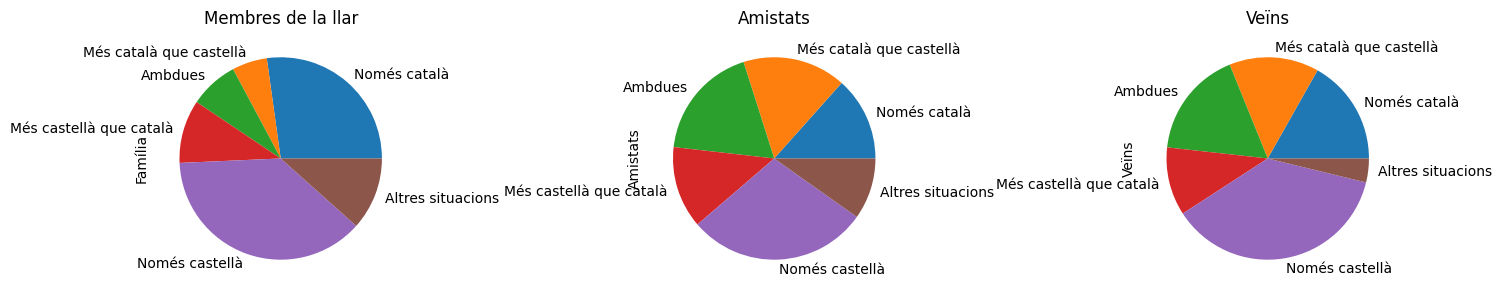

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns


# Plot each bar chart on a different subplot
df2018.iloc[0].plot(kind='pie', ax=axes[0], title='Membres de la llar')
df2018.iloc[1].plot(kind='pie', ax=axes[1], title='Amistats')
df2018.iloc[2].plot(kind='pie', ax=axes[2], title='Veïns')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

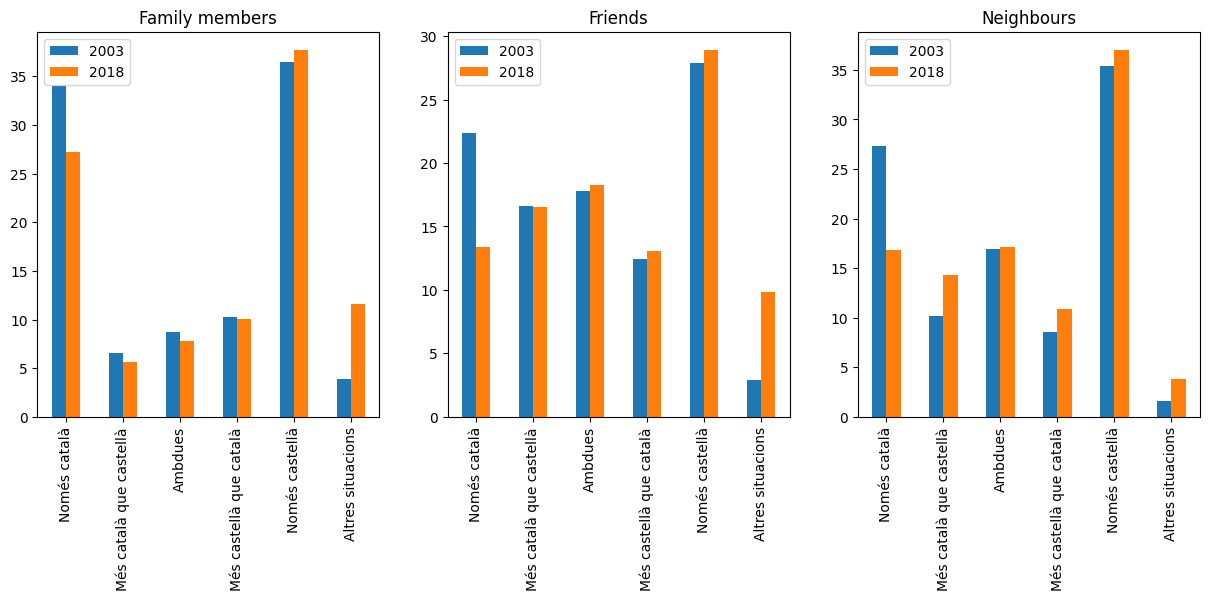

In [14]:
df_family = pd.concat([df2003.iloc[0], df2018.iloc[0]], axis=1, keys=['2003', '2018'])
df_friends = pd.concat([df2003.iloc[1], df2018.iloc[1]], axis=1, keys=['2003', '2018'])
df_neighbors = pd.concat([df2003.iloc[2], df2018.iloc[2]], axis=1, keys=['2003', '2018'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Crear un gráfico de barras
df_family.plot(kind='bar', ax=axes[0], title='Family members')
df_friends.plot(kind='bar',ax=axes[1], title='Friends')
df_neighbors.plot(kind='bar',ax=axes[2], title='Neighbours')


plt.show()

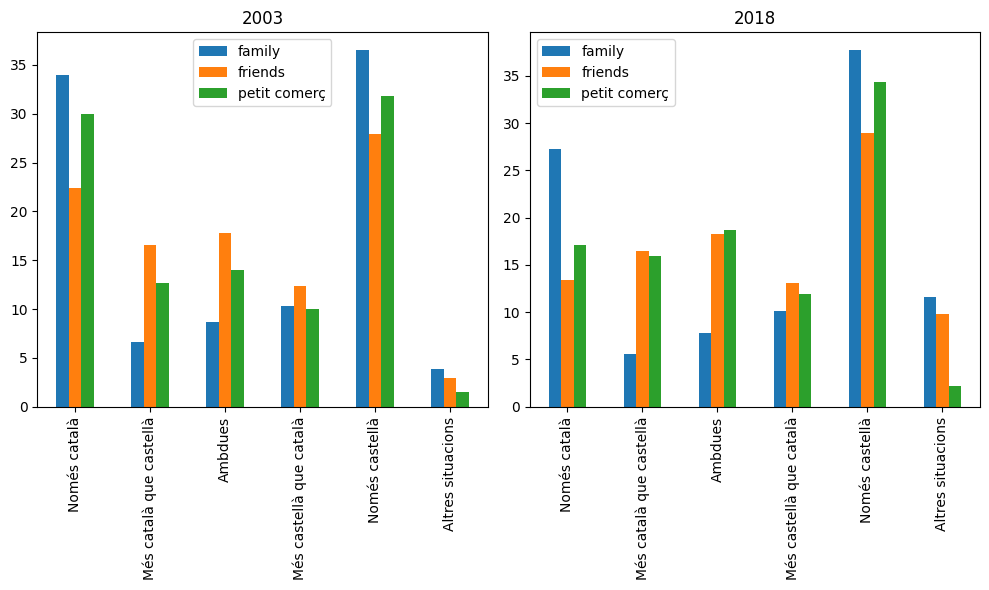

In [15]:
df_comparison2018 = pd.concat([df2018.iloc[0], df2018.iloc[1],df2018.iloc[6]], axis=1, keys=['family', 'friends','petit comerç'])
df_comparison2003 = pd.concat([df2003.iloc[0], df2003.iloc[1],df2003.iloc[6]], axis=1, keys=['family', 'friends','petit comerç'])

fig, axes = plt.subplots(1, 2, figsize=(5, 5))  # 1 row, 3 columns

df_comparison2003.plot(kind='bar', ax=axes[0], figsize=(10, 6),title="2003")
df_comparison2018.plot(kind='bar', ax=axes[1], figsize=(10, 6),title="2018")

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()


Per a un any determinat veure en un gràfic de barres el repartiment de comportament en diversos àmbits

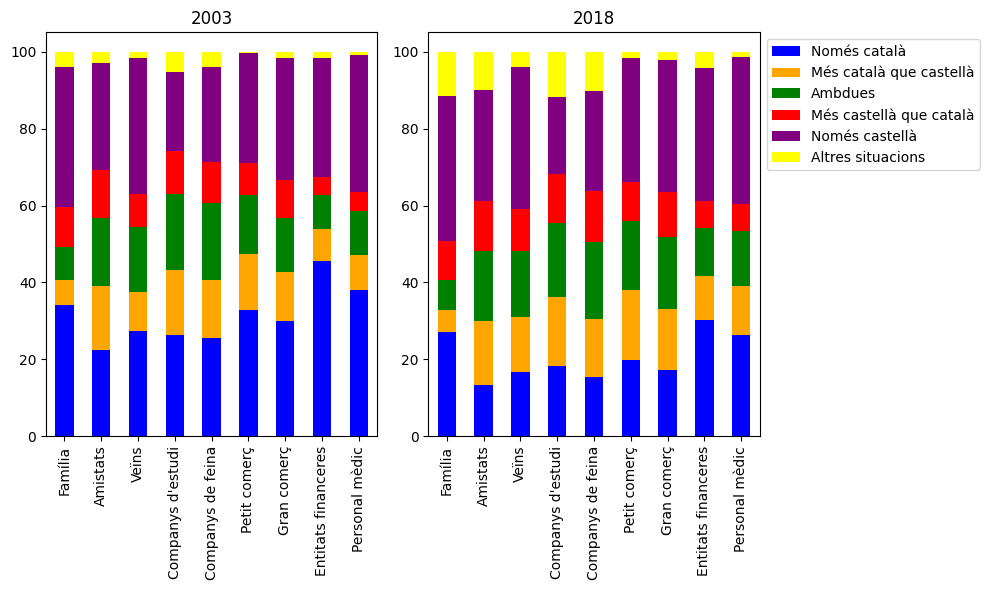

In [16]:
colors = ['blue', 'orange', 'green','red','purple','yellow']

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # 1 row, 3 columns

df2003.plot(kind='bar', ax=axes[0], stacked=True, figsize=(10, 6), color=colors,legend=False,title="2003")
df2018.plot(kind='bar', ax=axes[1], stacked=True, figsize=(10, 6), color=colors,legend=True,title="2018")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside the plot

plt.tight_layout()  # Adjust layout to prevent overlap



In [17]:
df2003.iloc[:, :2]

,Només català,Més català que castellà
Família,34.0,6.6
Amistats,22.4,16.6
Veïns,27.3,10.2
Companys d'estudi,26.2,17.1
Companys de feina,25.6,14.9
Petit comerç,32.8,14.5
Gran comerç,30.0,12.7
Entitats financeres,45.7,8.1
Personal mèdic,38.1,9.1


In [18]:
df2018.iloc[:,:2]

,Només català,Més català que castellà
Família,27.2,5.6
Amistats,13.4,16.5
Veïns,16.8,14.3
Companys d'estudi,18.2,18.1
Companys de feina,15.3,15.1
Petit comerç,19.9,18.0
Gran comerç,17.1,15.9
Entitats financeres,30.1,11.6
Personal mèdic,26.4,12.6


In [19]:
df_majority_of_catalan = pd.concat([df2003.iloc[:, :2],df2008.iloc[:, :2],df2013.iloc[:, :2],df2018.iloc[:, :2]],axis=1)
 
df_majority_of_catalan['2003'] = df_majority_of_catalan.iloc[:, 0] + df_majority_of_catalan.iloc[:, 1] # Combine columns 1 and 2
df_majority_of_catalan['2008'] = df_majority_of_catalan.iloc[:, 2] + df_majority_of_catalan.iloc[:, 3] # Combine columns 3 and 4
df_majority_of_catalan['2013'] = df_majority_of_catalan.iloc[:, 4] + df_majority_of_catalan.iloc[:, 5] # Combine columns 5 and 6
df_majority_of_catalan['2018'] = df_majority_of_catalan.iloc[:, 6] + df_majority_of_catalan.iloc[:, 7] # Combine columns 7 and 8


# Drop the original columns if desired (optional)
df_majority_of_catalan = df_majority_of_catalan[['2003','2008','2013','2018']]


In [20]:
df_majority_of_spanish = pd.concat([df2003.iloc[:, 3:5],df2008.iloc[:, 3:5],df2013.iloc[:, 3:5],df2018.iloc[:, 3:5]],axis=1)
 
df_majority_of_spanish['2003'] = df_majority_of_spanish.iloc[:, 0] + df_majority_of_spanish.iloc[:, 1] # Combine columns 1 and 2
df_majority_of_spanish['2008'] = df_majority_of_spanish.iloc[:, 2] + df_majority_of_spanish.iloc[:, 3] # Combine columns 3 and 4
df_majority_of_spanish['2013'] = df_majority_of_spanish.iloc[:, 4] + df_majority_of_spanish.iloc[:, 5] # Combine columns 5 and 6
df_majority_of_spanish['2018'] = df_majority_of_spanish.iloc[:, 6] + df_majority_of_spanish.iloc[:, 7] # Combine columns 7 and 8

# Drop the original columns if desired (optional)
df_majority_of_spanish = df_majority_of_spanish[['2003','2008','2013','2018']]


In [21]:
df_majority_of_catalan

,2003,2008,2013,2018
Família,40.6,35.2,31.9,32.8
Amistats,39.0,33.3,30.9,29.9
Veïns,37.5,32.2,31.9,31.1
Companys d'estudi,43.3,48.7,42.9,36.3
Companys de feina,40.5,33.6,33.0,30.4
Petit comerç,47.3,39.7,39.1,37.9
Gran comerç,42.7,33.8,33.6,33.0
Entitats financeres,53.8,44.9,42.3,41.7
Personal mèdic,47.2,41.6,40.3,39.0


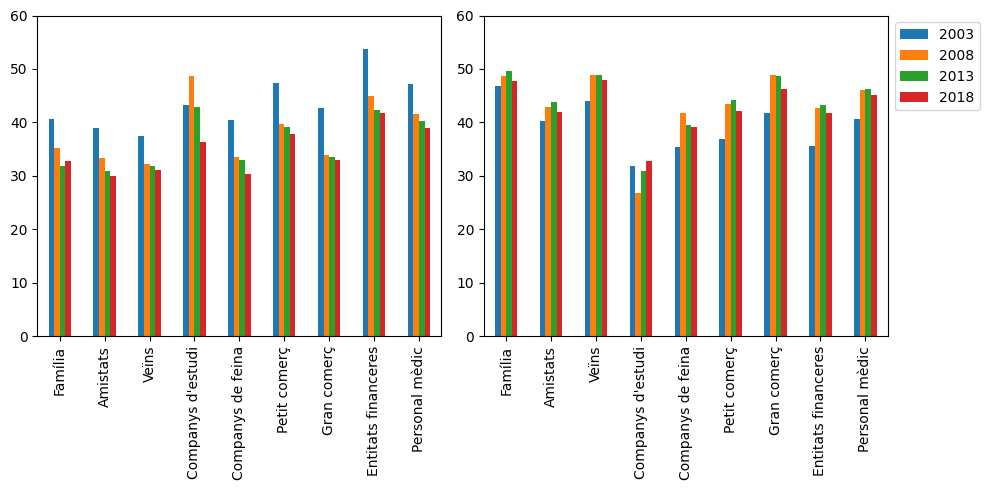

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

df_majority_of_catalan.plot(kind='bar',ax=axes[0],legend=False)
df_majority_of_spanish.plot(kind='bar',ax=axes[1],legend=True)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside the plot
axes[0].set_ylim(0, 60)
axes[1].set_ylim(0, 60)
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In the last graphic one can see the evolution of the categories "More catalan(including just catalan and more catalan than spanish)" and "More spanish(including just catalan and more catalan than spanish)". Another way of visualizing that data is with a heatmap

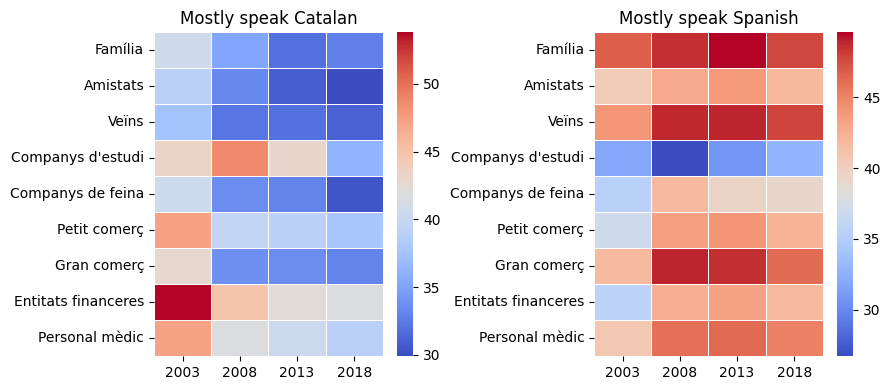

In [23]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  # 1 row, 3 columns

sns.heatmap(df_majority_of_catalan, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title("Mostly speak Catalan")
sns.heatmap(df_majority_of_spanish, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title("Mostly speak Spanish")
plt.tight_layout()  # Adjust layout to prevent overlap



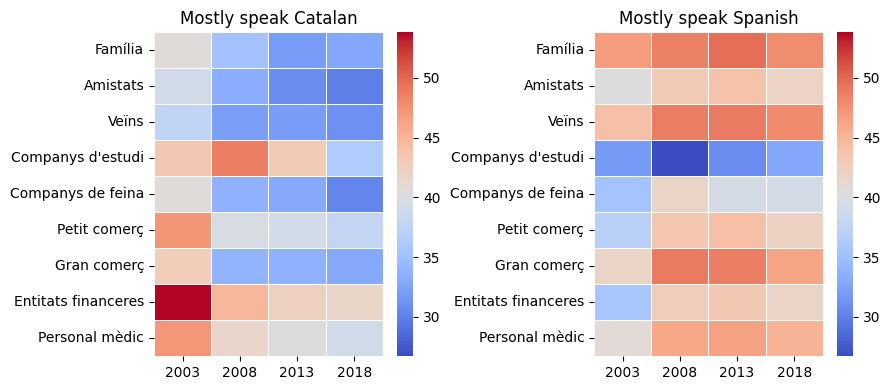

In [24]:
import seaborn as sns
import numpy as np

# Find the global minimum and maximum values across both datasets
global_min = min(df_majority_of_catalan.min().min(), df_majority_of_spanish.min().min())
global_max = max(df_majority_of_catalan.max().max(), df_majority_of_spanish.max().max())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  # 1 row, 2 columns

# Plot the heatmaps with shared color scale
sns.heatmap(df_majority_of_catalan, annot=False, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, ax=axes[0], vmin=global_min, vmax=global_max)
axes[0].set_title("Mostly speak Catalan")

sns.heatmap(df_majority_of_spanish, annot=False, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, ax=axes[1], vmin=global_min, vmax=global_max)
axes[1].set_title("Mostly speak Spanish")

# Adjust layout
plt.tight_layout()
plt.show()


Text(0.5, 1.0, '2003 - 2018 (% of lost majorily catalan speakers per ambit)')

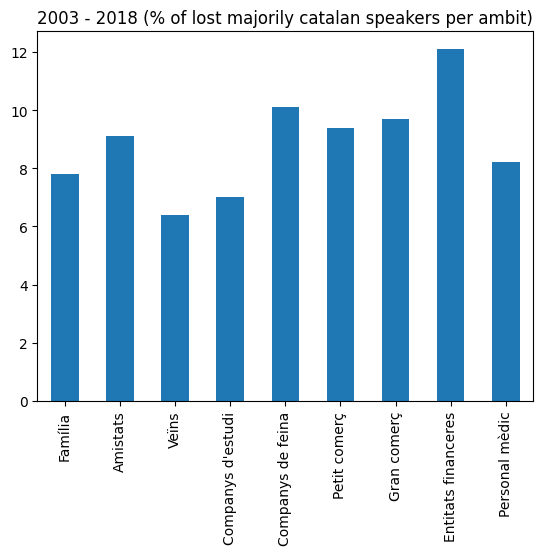

In [25]:

relative_difference = df_majority_of_catalan['2003'] - df_majority_of_catalan['2018']
relative_difference.plot(kind='bar')
plt.title('2003 - 2018 (% of lost majorily catalan speakers per ambit)')

In [26]:
ambits = ['Família',
'Amistats',
'Veïns',
"Companys d'estudi",
'Companys de feina',
'Petit comerç',
'Gran comerç',
'Entitats financeres',
'Personal mèdic']

In [38]:
df_majority_of_catalan

,2003,2008,2013,2018
Família,40.6,35.2,31.9,32.8
Amistats,39.0,33.3,30.9,29.9
Veïns,37.5,32.2,31.9,31.1
Companys d'estudi,43.3,48.7,42.9,36.3
Companys de feina,40.5,33.6,33.0,30.4
Petit comerç,47.3,39.7,39.1,37.9
Gran comerç,42.7,33.8,33.6,33.0
Entitats financeres,53.8,44.9,42.3,41.7
Personal mèdic,47.2,41.6,40.3,39.0


In [28]:
matrix = {}
for i in ambits:
    fila = []
    for j in ambits:
        element = df_majority_of_catalan.loc[i,'2018'] - df_majority_of_catalan.loc[j,'2003'] 
        fila.append(element)
        matrix[i] = fila
        
data_catalan = pd.DataFrame(matrix,index=ambits)

In [29]:
data_catalan

,Família,Amistats,Veïns,Companys d'estudi,Companys de feina,Petit comerç,Gran comerç,Entitats financeres,Personal mèdic
Família,-7.8,-10.7,-9.5,-4.3,-10.2,-2.7,-7.6,1.1,-1.6
Amistats,-6.2,-9.1,-7.9,-2.7,-8.6,-1.1,-6.0,2.7,0.0
Veïns,-4.7,-7.6,-6.4,-1.2,-7.1,0.4,-4.5,4.2,1.5
Companys d'estudi,-10.5,-13.4,-12.2,-7.0,-12.9,-5.4,-10.3,-1.6,-4.3
Companys de feina,-7.7,-10.6,-9.4,-4.2,-10.1,-2.6,-7.5,1.2,-1.5
Petit comerç,-14.5,-17.4,-16.2,-11.0,-16.9,-9.4,-14.3,-5.6,-8.3
Gran comerç,-9.9,-12.8,-11.6,-6.4,-12.3,-4.8,-9.7,-1.0,-3.7
Entitats financeres,-21.0,-23.9,-22.7,-17.5,-23.4,-15.9,-20.8,-12.1,-14.8
Personal mèdic,-14.4,-17.3,-16.1,-10.9,-16.8,-9.3,-14.2,-5.5,-8.2


### First verion of the heatmap, taking just the difference 2018 - 2003.

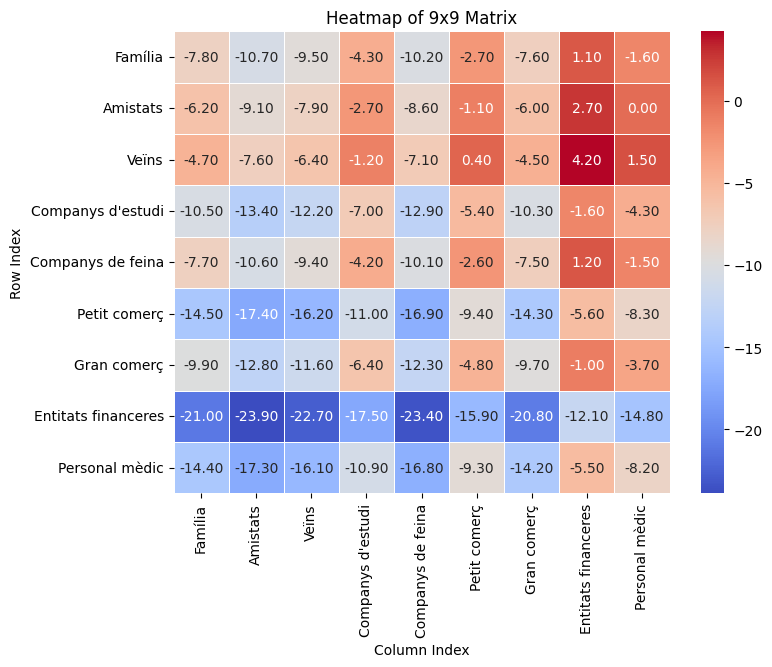

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the size of the heatmap
sns.heatmap(data_catalan, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of 9x9 Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Display the heatmap
plt.show()

### Second verion of the heatmap, taking the difference 2018 - 2003 in the diagonal and the upper diagonal and 2003-2018 in the lower diagonal

In [45]:
values_2003 = df_majority_of_catalan["2003"].values
values_2018 = df_majority_of_catalan["2018"].values
# Number of categories
num_categories = len(df_majority_of_catalan)

# Create an empty matrix
matrix = np.zeros((num_categories, num_categories))

# Fill the matrix
for i in range(num_categories):
    for j in range(num_categories):
        if i <= j:
            # Upper diagonal (including diagonal)
            matrix[i, j] = (values_2018[i] - values_2003[j]) /  values_2003[j]
        else:
            # Lower diagonal
            matrix[i, j] = (values_2003[i] - values_2018[j]) /  values_2018[j]

# Convert to a DataFrame for better readability
data_catalan2 = pd.DataFrame(matrix, index=df_majority_of_catalan.index, columns=df_majority_of_catalan.index)

# Display the resulting matrix
print(data_catalan2)

                      Família  Amistats     Veïns  Companys d'estudi  \
Família             -0.192118 -0.158974 -0.125333          -0.242494   
Amistats             0.189024 -0.233333 -0.202667          -0.309469   
Veïns                0.143293  0.254181 -0.170667          -0.281755   
Companys d'estudi    0.320122  0.448161  0.392283          -0.161663   
Companys de feina    0.234756  0.354515  0.302251           0.115702   
Petit comerç         0.442073  0.581940  0.520900           0.303030   
Gran comerç          0.301829  0.428094  0.372990           0.176309   
Entitats financeres  0.640244  0.799331  0.729904           0.482094   
Personal mèdic       0.439024  0.578595  0.517685           0.300275   

                     Companys de feina  Petit comerç  Gran comerç  \
Família                      -0.190123     -0.306554    -0.231850   
Amistats                     -0.261728     -0.367865    -0.299766   
Veïns                        -0.232099     -0.342495    -0.271663   
Com

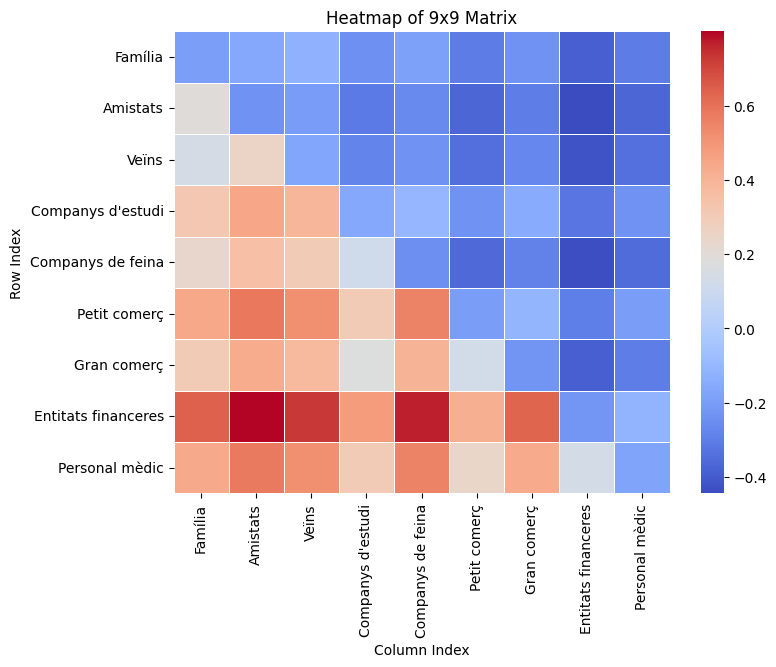

In [46]:
plt.figure(figsize=(8, 6))  # Adjust the size of the heatmap
sns.heatmap(data_catalan2, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of 9x9 Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Display the heatmap
plt.show()

Now I want to focus for instance in a particular catgeory, say "Friends". For this category I would like to analize how has the tendency of the answers changed over the 4 different years for which I have the data. In other words, want to observe the flow/ evolution of the answers... To do so, first I need to localize the different rows for each dataframe in order to define a new matrix to finally represent the Sankey diagram.

In [33]:
df_amistats = pd.concat([
    df2003.loc[['Amistats']].assign(Year=2003),
    df2008.loc[['Amistats']].assign(Year=2008),
    df2013.loc[['Amistats']].assign(Year=2013),
    df2018.loc[['Amistats']].assign(Year=2018)
])


print(df_amistats)

          Només català  Més català que castellà  Ambdues  \
Amistats          22.4                     16.6     17.8   
Amistats          22.5                     10.8     16.8   
Amistats          15.0                     15.9     15.7   
Amistats          13.4                     16.5     18.3   

          Més castellà que català  Només castellà  Altres situacions  Year  
Amistats                     12.4            27.9                2.9  2003  
Amistats                      9.0            33.9                2.7  2008  
Amistats                     13.1            30.7                1.7  2013  
Amistats                     13.1            28.9                9.8  2018  


Let's try to do for a given year a Sankey ciruclar Diagram. The connections are between each answer and each ambit. It may show the same information but in a more dynamic and visual way.

In [34]:
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Família,27.2,5.6,7.8,10.1,37.7,11.6
Amistats,13.4,16.5,18.3,13.1,28.9,9.8
Veïns,16.8,14.3,17.1,10.9,37.0,3.8
Companys d'estudi,18.2,18.1,19.1,12.9,19.9,11.7
Companys de feina,15.3,15.1,20.2,13.2,26.0,10.3
Petit comerç,19.9,18.0,18.2,10.0,32.2,1.8
Gran comerç,17.1,15.9,18.7,11.9,34.3,2.2
Entitats financeres,30.1,11.6,12.4,7.0,34.8,4.2
Personal mèdic,26.4,12.6,14.5,6.8,38.4,1.4


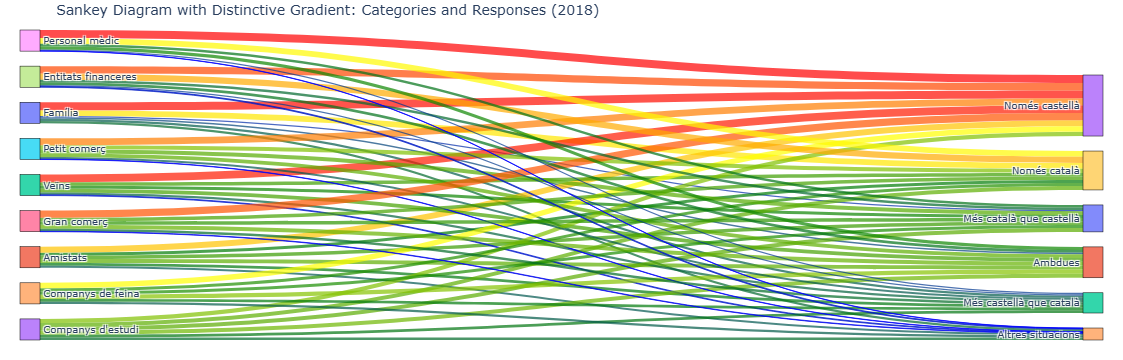

In [36]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Define nodes: categories + answers
categories = ["Família", "Amistats", "Veïns", "Companys d'estudi", "Companys de feina",
              "Petit comerç", "Gran comerç", "Entitats financeres", "Personal mèdic"]
answers = ["Només català", "Més català que castellà", "Ambdues", 
           "Més castellà que català", "Només castellà", "Altres situacions"]

# Combine all nodes into one list
nodes = categories + answers

# Map nodes to indices
node_indices = {node: idx for idx, node in enumerate(nodes)}

data = []
for i in categories:
    ambit = []
    for k in (df2018.loc[i]):
        ambit.append(k)
    data.append(ambit)
data

# Create links
source = []
target = []
value = []

for i, category in enumerate(categories):
    for j, answer in enumerate(answers):
        source.append(node_indices[category])
        target.append(node_indices[answer])
        value.append(data[i][j])

# Generate a more distinctive color gradient
# Create a custom colormap (Yellow → Red → Blue → Purple)
colors_list = ["blue","green","yellow", "red",]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

# Normalize the values for the colormap
norm = mcolors.Normalize(vmin=min(value), vmax=max(value))

# Map the values to the gradient and convert to rgba
colors = [
    f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
    for r, g, b, _ in custom_cmap(norm(value))
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # Apply the custom gradient colors
    )
))

fig.update_layout(
    title_text="Sankey Diagram with Distinctive Gradient: Categories and Responses (2018)",
    font_size=10,
    margin=dict(l=20, r=20, t=30, b=20),
)

fig.show()


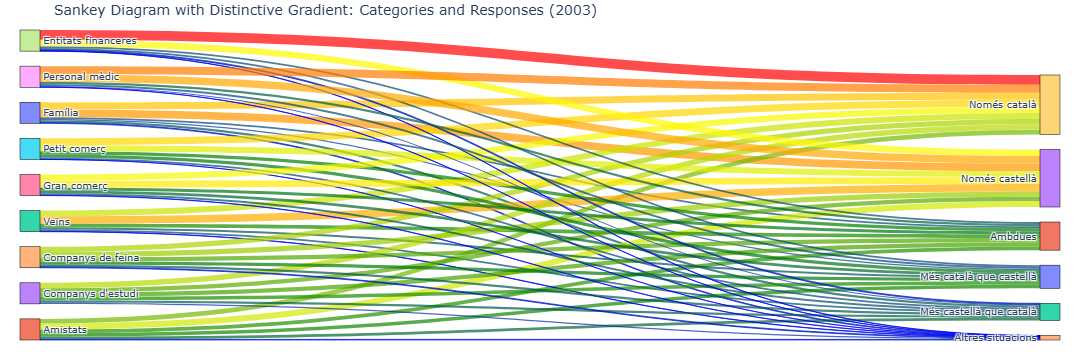

In [47]:
data = []
for i in categories:
    ambit = []
    for k in (df2003.loc[i]):
        ambit.append(k)
    data.append(ambit)
data

# Create links
source = []
target = []
value = []

for i, category in enumerate(categories):
    for j, answer in enumerate(answers):
        source.append(node_indices[category])
        target.append(node_indices[answer])
        value.append(data[i][j])

# Generate a more distinctive color gradient
# Create a custom colormap (Yellow → Red → Blue → Purple)
colors_list = ["blue","green","yellow", "red",]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

# Normalize the values for the colormap
norm = mcolors.Normalize(vmin=min(value), vmax=max(value))

# Map the values to the gradient and convert to rgba
colors = [
    f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
    for r, g, b, _ in custom_cmap(norm(value))
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # Apply the custom gradient colors
    )
))

fig.update_layout(
    title_text="Sankey Diagram with Distinctive Gradient: Categories and Responses (2003)",
    font_size=10,
    margin=dict(l=20, r=20, t=30, b=20),
)

fig.show()


Putting now both graphics with the same color scale in order to compare the tendencies of the answers of the survey in two different years


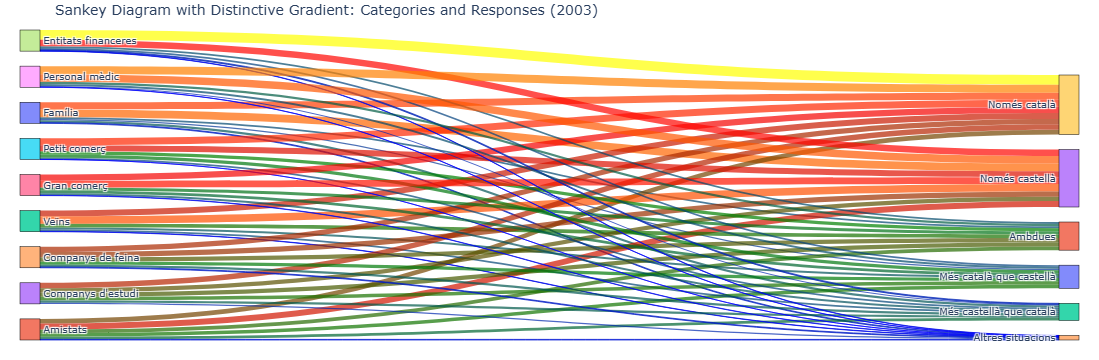

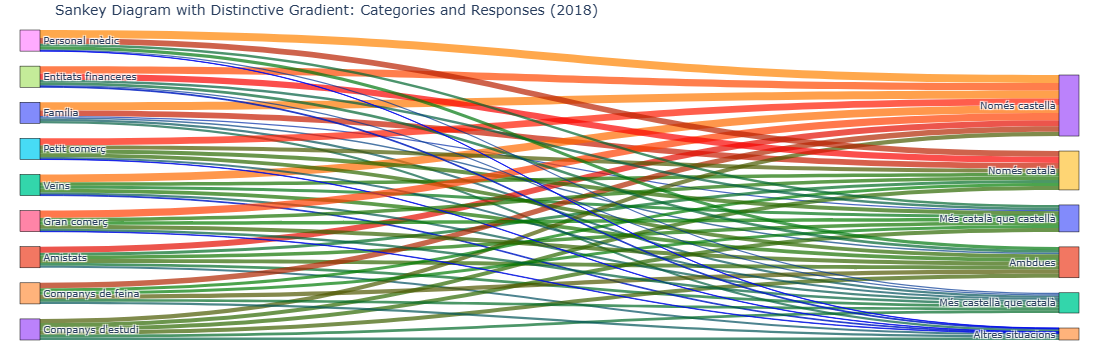

In [44]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Example: Assuming you have dataframes df2018 and df2019
# Find the global min and max across both datasets (df2018 and df2019)
global_min = min(df2003.min().min(), df2018.min().min())
global_max = max(df2003.max().max(), df2018.max().max())

# Function to generate Sankey diagram
def create_sankey(df, year, categories, answers, nodes):
    data = []
    for i in categories:
        ambit = []
        for k in df.loc[i]:
            ambit.append(k)
        data.append(ambit)

    # Create links
    source = []
    target = []
    value = []

    for i, category in enumerate(categories):
        for j, answer in enumerate(answers):
            source.append(node_indices[category])
            target.append(node_indices[answer])
            value.append(data[i][j])

    # Generate a more distinctive color gradient (Yellow → Red → Blue → Purple)
    colors_list = ["blue","green", "red" , "yellow"]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

    # Normalize the values for the color map based on the global min and max
    norm = mcolors.Normalize(vmin=global_min, vmax=global_max)

    # Map the values to the gradient and convert to rgba
    colors = [
        f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
        for r, g, b, _ in custom_cmap(norm(value))
    ]

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        arrangement="snap",
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=colors  # Apply the custom gradient colors
        )
    ))

    fig.update_layout(
        title_text=f"Sankey Diagram with Distinctive Gradient: Categories and Responses ({year})",
        font_size=10,
        margin=dict(l=20, r=20, t=30, b=20),
    )

    return fig

# Now, create the Sankey diagrams for both years
fig_2003 = create_sankey(df2003, 2003, categories, answers, nodes)
fig_2018 = create_sankey(df2018, 2018, categories, answers, nodes)

# Show the figures for both years
fig_2003.show()
fig_2018.show()
